# EDA with Python and applying Logistic Regression. 

Working on Titanic Dataset from kaggle. my first step in machine learning. 

to predict = classification - survival or or deceased. implementing logistic regression in python for classification. 

Note: this is a semi-cleaned version of the titanic dataset. using dataset hosted directly on Kaggle needs additional cleaning. 

**Author - Tanmay Karn, B.Tech, CSE, NIT Rourkela\
07/05/2024, Tuesday**

In [20]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [21]:
#reading the dataset: 
df = pd.read_csv('titanic_train.csv')
df.head()

#SibSp = count of siblings and spouses. 
#Parch = count of parent and children.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

Check for Missing data using seaborn - create a heatmap to see where data is missing

In [22]:
df.isnull()
#if any item is True, it means NaN

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

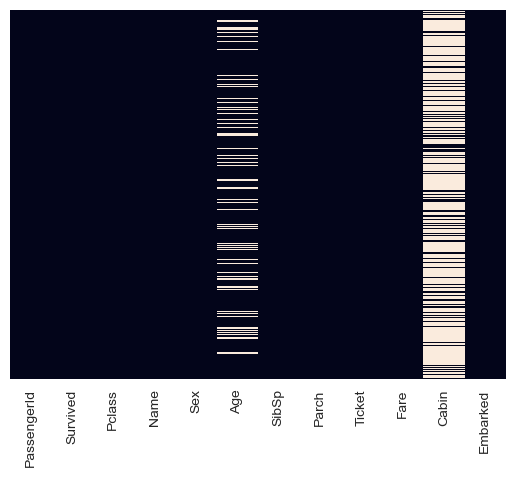

In [23]:
#better way to check for Nan values: 
sns.heatmap(df.isnull(), yticklabels=False, cbar = False)
#all the null values shown in white color

Observations: \
~20% of Age data is missing. \
proportion of Age missing small enough for replacement with some form of imputation. \
Cabin Col has too much of data. probably drop at later stage, or change it to another feature like Cabin Known : 1 or 0

<Axes: xlabel='Survived', ylabel='count'>

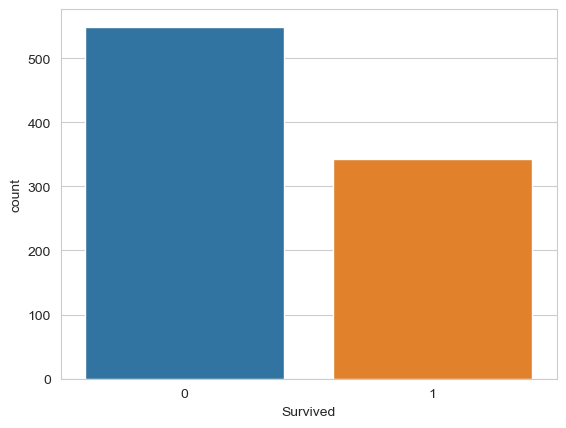

In [24]:
#visualize count of person survived or deceased. 
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = df)

<Axes: xlabel='Survived', ylabel='count'>

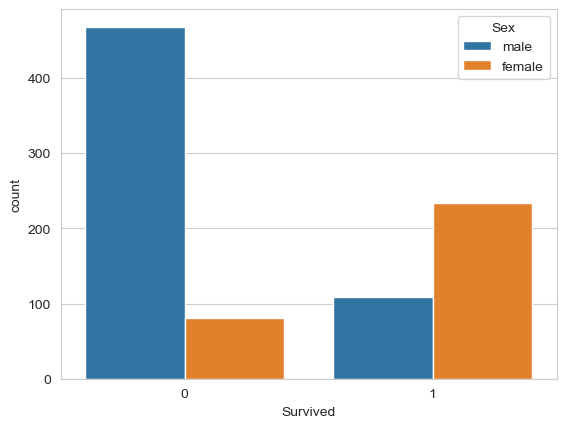

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data = df)

In [40]:
df['Survived'].dtype

dtype('int64')

In [41]:
df['Pclass'] = df['Pclass'].astype(str)

<Axes: xlabel='Survived', ylabel='count'>

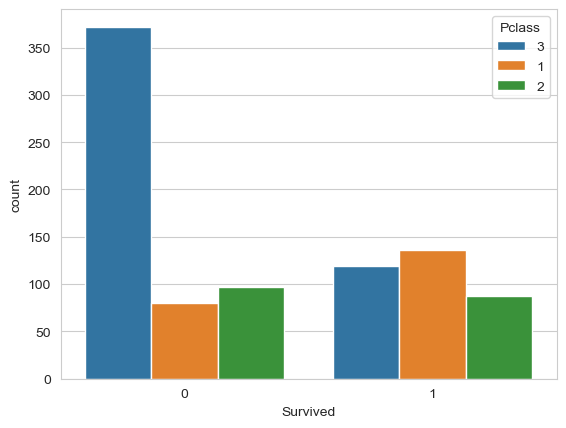

In [42]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

C:\Users\HP\AppData\Local\Temp\ipykernel_2212\3422491825.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde = False, bins = 40)


<Axes: xlabel='Age'>

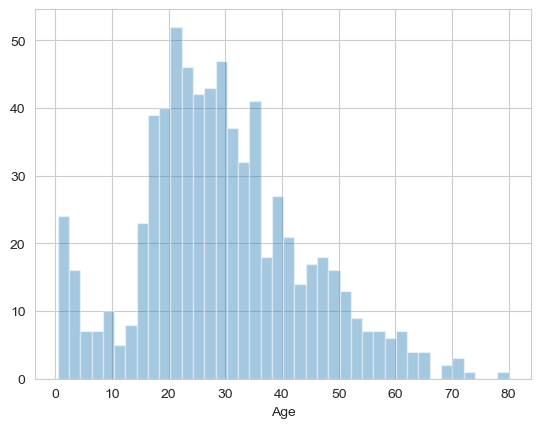

In [43]:
#check the distribution of of 'age' col: 
sns.distplot(df['Age'], kde = False, bins = 40)

Age forms a normal distribution, (Bell Curve) with some outliers. 

<Axes: xlabel='SibSp', ylabel='count'>

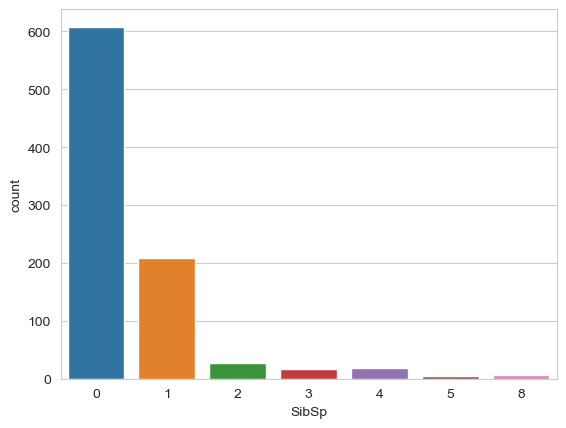

In [44]:
#check the count for siblings and spouses: 
sns.countplot(x = 'SibSp', data = df)

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


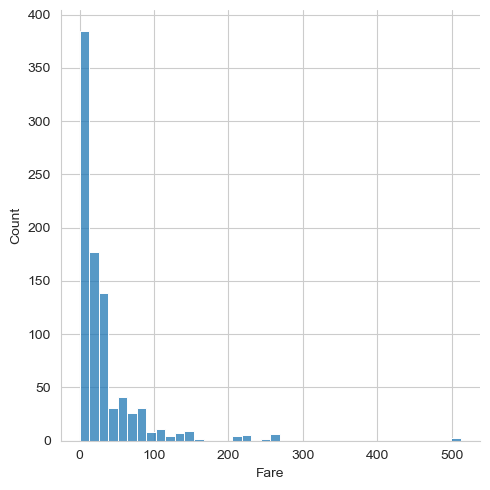

In [45]:
#histogram for Fare col: 
sns.displot(df['Fare'], kde = False, bins = 40)

<Axes: >

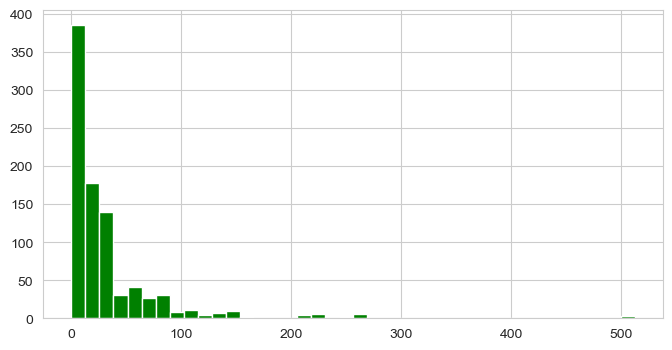

In [46]:
#another way: 
df['Fare'].hist(color = 'green', bins = 40, figsize=(8,4))

# Data Cleaning

fill missing Age data instead of dropping it by filling the mean age in the missing records (imputation). \
checking average age by passenger class column: 

<Axes: xlabel='Pclass', ylabel='Age'>

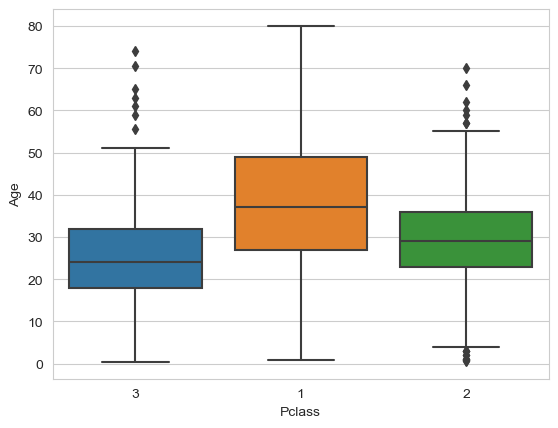

In [47]:
sns.boxplot(x = 'Pclass', y = 'Age', data = df)

observation: 
passenger in the higher classes tend to be older. 

In [48]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: 
            return 24

    else:
        return Age

In [49]:
#call the function using .apply method:

df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_2212\3249436800.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\HP\AppData\Local\Temp\ipykernel_2212\3249436800.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


<Axes: >

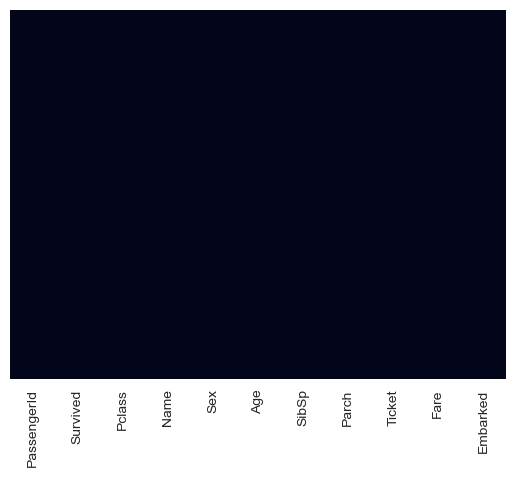

In [53]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

Cabin columns has a lot of NaN values, which needs feature engineering. instead, drop the column. 

In [52]:
df.drop('Cabin', axis = 1, inplace = True)

KeyError: "['Cabin'] not found in axis"

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [55]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

# converting categorical features: 

convert categorical features like sex and embarked into dummy variables using pandas. or else, the ML algorithm won't be able \
to take in those features as inputs. 

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [58]:
pd.get_dummies(df['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [59]:
#do it for sex and embarked: 
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)

In [60]:
#drop the columns for which dummy variables have been created or it's not of use (Name, ticket)
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [61]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [62]:
#concatenate the dummy variables: 
df = pd.concat([df, sex, embark], axis = 1)

In [63]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


Our data is ready for the model

# Build a logistic regression model

In [64]:
#drop the dependent feature (survived column):

df.drop('Survived', axis = 1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [65]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size = 0.3, 
                                                    random_state = 101)

# Training and Predicting:

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [87]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
predictions = logmodel.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [89]:
accuracy = confusion_matrix(y_test, predictions)

In [90]:
accuracy

array([[132,  22],
       [ 43,  71]], dtype=int64)

In [91]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7574626865671642

In [92]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)